In [1]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from torchvision import datasets, transforms
from net import NormalNetwork, PCANetwork, train_network, test_network

#### Train with MNIST dataset

In [2]:
model = NormalNetwork(unpack_data=True)

In [3]:
train_network(model)

Training epoch 20: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:01<00:00, 1089.61it/s]


#### Test with MNIST dataset

In [4]:
res = test_network(model)
print(res)

Testing network: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 1348.99it/s]

{'accuracy': 0.9791, 'loss': 0.06446099373287972, 'confusion matrix': array([[ 968,    0,    1,    1,    1,    2,    3,    1,    2,    1],
       [   0, 1128,    2,    1,    0,    1,    2,    0,    1,    0],
       [   3,    3, 1011,    2,    2,    0,    3,    3,    5,    0],
       [   0,    0,    7,  990,    0,    4,    0,    2,    3,    4],
       [   0,    0,    3,    0,  969,    0,    2,    1,    0,    7],
       [   2,    0,    0,    6,    1,  875,    2,    0,    3,    3],
       [   5,    3,    1,    1,    4,    6,  937,    0,    1,    0],
       [   2,    5,    7,    1,    4,    0,    0,  996,    2,   11],
       [   5,    0,    3,    7,    4,    7,    3,    3,  937,    5],
       [   2,    2,    0,    5,   11,    3,    1,    4,    1,  980]])}


#### Plot confusion matrix

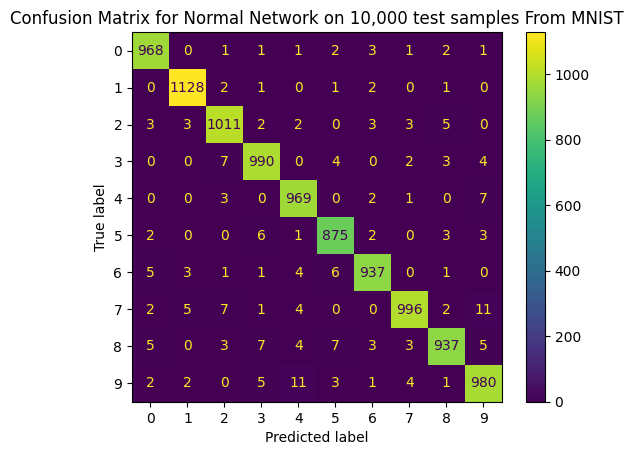

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix= res["confusion matrix"])
disp.plot()
plt.title("Confusion Matrix for Normal Network on 10,000 test samples From MNIST")
plt.show()

#### Train with PCA data

In [33]:
model = PCANetwork(0.95, unpack_data=True)

In [34]:
model

PCANetwork(
  (forward_prob): Sequential(
    (0): Linear(in_features=331, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
  (loss_func): CrossEntropyLoss()
)

In [35]:
train_network(model)

Training epoch 20: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:01<00:00, 1763.06it/s]


In [36]:
res = test_network(model)
print(res)

Testing network: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 2106.48it/s]

{'accuracy': 0.9718, 'loss': 0.10916719047849947, 'confusion matrix': array([[ 967,    0,    2,    2,    0,    4,    2,    2,    1,    0],
       [   0, 1125,    4,    1,    0,    1,    1,    1,    2,    0],
       [   7,    3,  996,    7,    3,    0,    4,    7,    4,    1],
       [   0,    0,    3,  986,    0,    6,    0,    8,    4,    3],
       [   0,    0,    8,    0,  956,    1,    2,    2,    2,   11],
       [   3,    0,    0,   10,    1,  867,    3,    2,    4,    2],
       [   5,    3,    2,    1,    5,    8,  928,    2,    4,    0],
       [   1,    5,    9,    1,    2,    0,    0,  993,    4,   13],
       [   4,    1,    3,   10,    5,    8,    3,    6,  929,    5],
       [   3,    4,    0,    8,   12,    4,    0,    5,    2,  971]])}


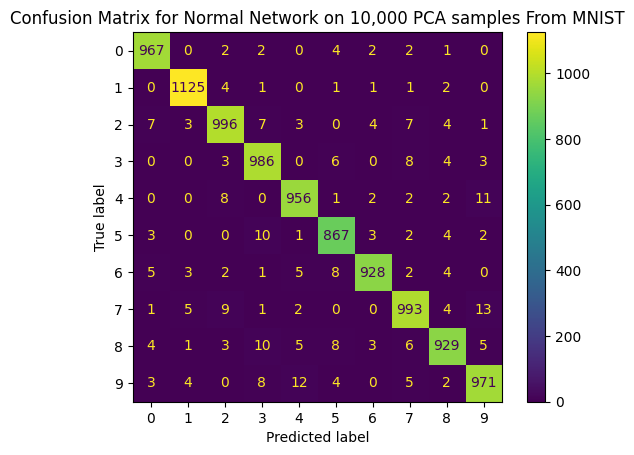

In [37]:
disp = ConfusionMatrixDisplay(confusion_matrix=res["confusion matrix"])
disp.plot()
plt.title("Confusion Matrix for Normal Network on 10,000 PCA samples From MNIST")
plt.show()

In [2]:
from graph import draw_metric_graph, draw_dataset_size_graph

Initializing networks...


Testing network: 100%|████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 1868.77it/s]


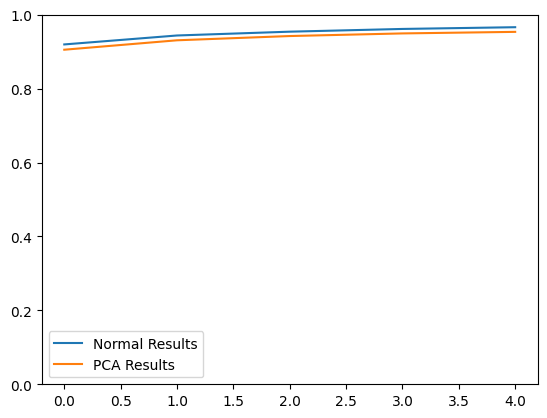

In [3]:
draw_metric_graph(pca_thresh=0.95, epochs=5)

Testing network: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:01<00:00, 165.39it/s]


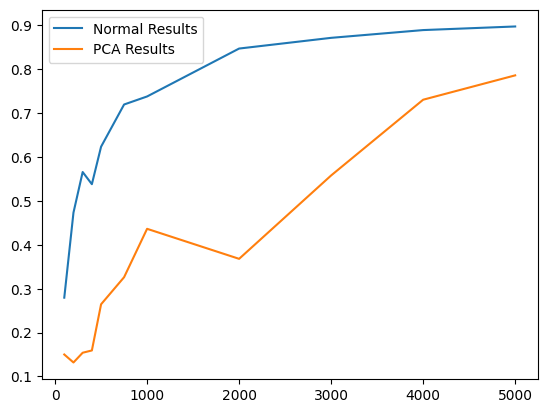

In [39]:
draw_dataset_size_graph(epochs=5)